# Poland Cars for Sale Dataset

* ID - unique ID of offer
* Price - value of the price
* Currency - currency of the price (mostly polish złoty, but also some euro)
* Condition - new or used
* Vehicle_brand - brand of vehicle in offer
* Vehicle_model - model of vehicle in offer
* Vehicle_generation - generation of vehicle in offer
* Vehicle_version - version of vehicle in offer
* Production_year - year of car production
* Mileage_km - total distance that the car has driven in kilometers
* Power_HP - car engine power in horsepower
* Displacement_cm3 - car engine size in cubic centimeters
* Fuel_type - car fuel type
* CO2_emissions - car CO2 emissions in g/km
* Drive - type of car drive
* Transmission - type of car transmission
* Type - car body style
* Doors_number - number of car doors
* Colour - car body color
* Origin_country - country of origin of the car
* First_owner - whether the owner is the first owner
* First_registration_date - date of first registration
* Offer_publication_date - date of publication of the offer
* Offer_location - address provided by the issuer
* Features - listed car features (ABS, airbag, parking sensors e.t.c)

# Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("ArpineA_data.csv")
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021.0,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974.0,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018.0,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012.0,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021.0,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


# Quick Descriptive analysis

In [3]:
#Getting general info about datatypes, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124879 entries, 0 to 124878
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    124879 non-null  int64  
 1   Price                    124879 non-null  int64  
 2   Currency                 124879 non-null  object 
 3   Condition                124879 non-null  object 
 4   Vehicle_brand            124879 non-null  object 
 5   Vehicle_model            124879 non-null  object 
 6   Vehicle_version          83196 non-null   object 
 7   Vehicle_generation       88967 non-null   object 
 8   Production_year          124878 non-null  float64
 9   Mileage_km               124198 non-null  float64
 10  Power_HP                 124493 non-null  float64
 11  Displacement_cm3         123672 non-null  float64
 12  Fuel_type                124878 non-null  object 
 13  CO2_emissions            57305 non-null   float64
 14  Driv

In [4]:
#Checking for the missing values
df.isnull().sum()

,0
Index,0
Price,0
Currency,0
Condition,0
Vehicle_brand,0
Vehicle_model,0
Vehicle_version,41683
Vehicle_generation,35912
Production_year,1
Mileage_km,681


In [5]:
#calculating summary statistics for numerical datatypes
df.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,124879.00000,1.248790e+05,124878.000000,1.241980e+05,124493.000000,123672.000000,5.730500e+04,123935.00000
mean,62439.00000,7.052165e+04,2012.078805,1.374329e+05,164.700843,1999.897317,5.236947e+05,4.58525
std,36049.60647,9.635641e+04,6.983221,3.033333e+05,86.615915,831.237396,9.340835e+07,0.80048
min,0.00000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.00000
25%,31219.50000,1.890000e+04,2008.000000,4.900000e+04,110.000000,1499.000000,1.240000e+02,4.00000
50%,62439.00000,3.890000e+04,2013.000000,1.410000e+05,143.000000,1968.000000,1.430000e+02,5.00000
75%,93658.50000,8.390000e+04,2017.000000,2.050000e+05,190.000000,1999.000000,1.690000e+02,5.00000
max,124878.00000,6.999000e+06,2021.000000,1.000000e+08,1398.000000,8400.000000,2.000000e+10,7.00000


In [6]:
print(df["Offer_publication_date"])

0         04/05/2021
1         03/05/2021
2         03/05/2021
3         30/04/2021
4         30/04/2021
             ...    
124874    02/05/2021
124875    30/04/2021
124876    29/04/2021
124877    04/05/2021
124878           NaN
Name: Offer_publication_date, Length: 124879, dtype: object


In [7]:
print(df["First_registration_date"])

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
124874           NaN
124875           NaN
124876    13/04/2018
124877           NaN
124878           NaN
Name: First_registration_date, Length: 124879, dtype: object


In [8]:
#taking care of the datatypes
df['Offer_publication_date'] = pd.to_datetime(df['Offer_publication_date'], format='%d/%m/%Y', errors='coerce')
df['First_registration_date'] = pd.to_datetime(df['First_registration_date'], format='%d/%m/%Y', errors='coerce')

print(df.dtypes[['Offer_publication_date', 'First_registration_date']])

Offer_publication_date     datetime64[ns]
First_registration_date    datetime64[ns]
dtype: object


In [9]:
#Checking if there are duplicates
df.duplicated().sum()

0

# Exploring the data through visualizations

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [11]:
#Checking for unique values for each categorical feature
for i in categorical_cols:
    unique_values = df[i].unique()
    print(f"Feature: {i}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Feature: Currency
Unique Values (2): ['PLN' 'EUR']

Feature: Condition
Unique Values (2): ['New' 'Used']

Feature: Vehicle_brand
Unique Values (69): ['Abarth' 'Acura' 'Aixam' 'Alfa Romeo' 'Alpine' 'Aston Martin' 'Audi'
 'Austin' 'Autobianchi' 'Baic' 'Bentley' 'BMW' 'Buick' 'Cadillac'
 'Casalini' 'Chatenet' 'Chevrolet' 'Chrysler' 'Citroën' 'Cupra' 'Dacia'
 'Daewoo' 'Daihatsu' 'DFSK' 'DKW' 'Dodge' 'DS Automobiles' 'FAW' 'Ferrari'
 'Fiat' 'Ford' 'Gaz' 'GMC' 'Grecav' 'Honda' 'Hummer' 'Hyundai' 'Infiniti'
 'Isuzu' 'Iveco' 'Jaguar' 'Jeep' 'Kia' 'Lada' 'Lamborghini' 'Lancia'
 'Land Rover' 'Lexus' 'Ligier' 'Lincoln' 'Lotus' 'MAN' 'Warszawa'
 'Maserati' 'Maybach' 'Mazda' 'McLaren' 'Mercedes-Benz' 'Mercury' 'MG'
 'Microcar' 'MINI' 'Mitsubishi' 'Moskwicz' 'Nissan' 'NSU' 'Nysa'
 'Oldsmobile' 'Opel']

Feature: Vehicle_model
Unique Values (837): ['595' 'Other' '500' 'Grande Punto' '124' 'RDX' 'TSX' 'MDX' 'TL' 'RL'
 'City' 'Crossover' 'Crossline' 'A721' 'Coupe' 'GTO' 'Scouty R' 'A751'
 'Roadline' 'A7

In [12]:
# Count unique values for all columns
unique_counts_all = df[categorical_cols].nunique()
print(unique_counts_all)

Currency                   2
Condition                  2
Vehicle_brand             69
Vehicle_model            837
Vehicle_version        11665
Vehicle_generation       409
Fuel_type                  7
Drive                      5
Transmission               2
Type                       9
Colour                    14
Origin_country            37
First_owner                1
Offer_location         11407
Features              106244
dtype: int64


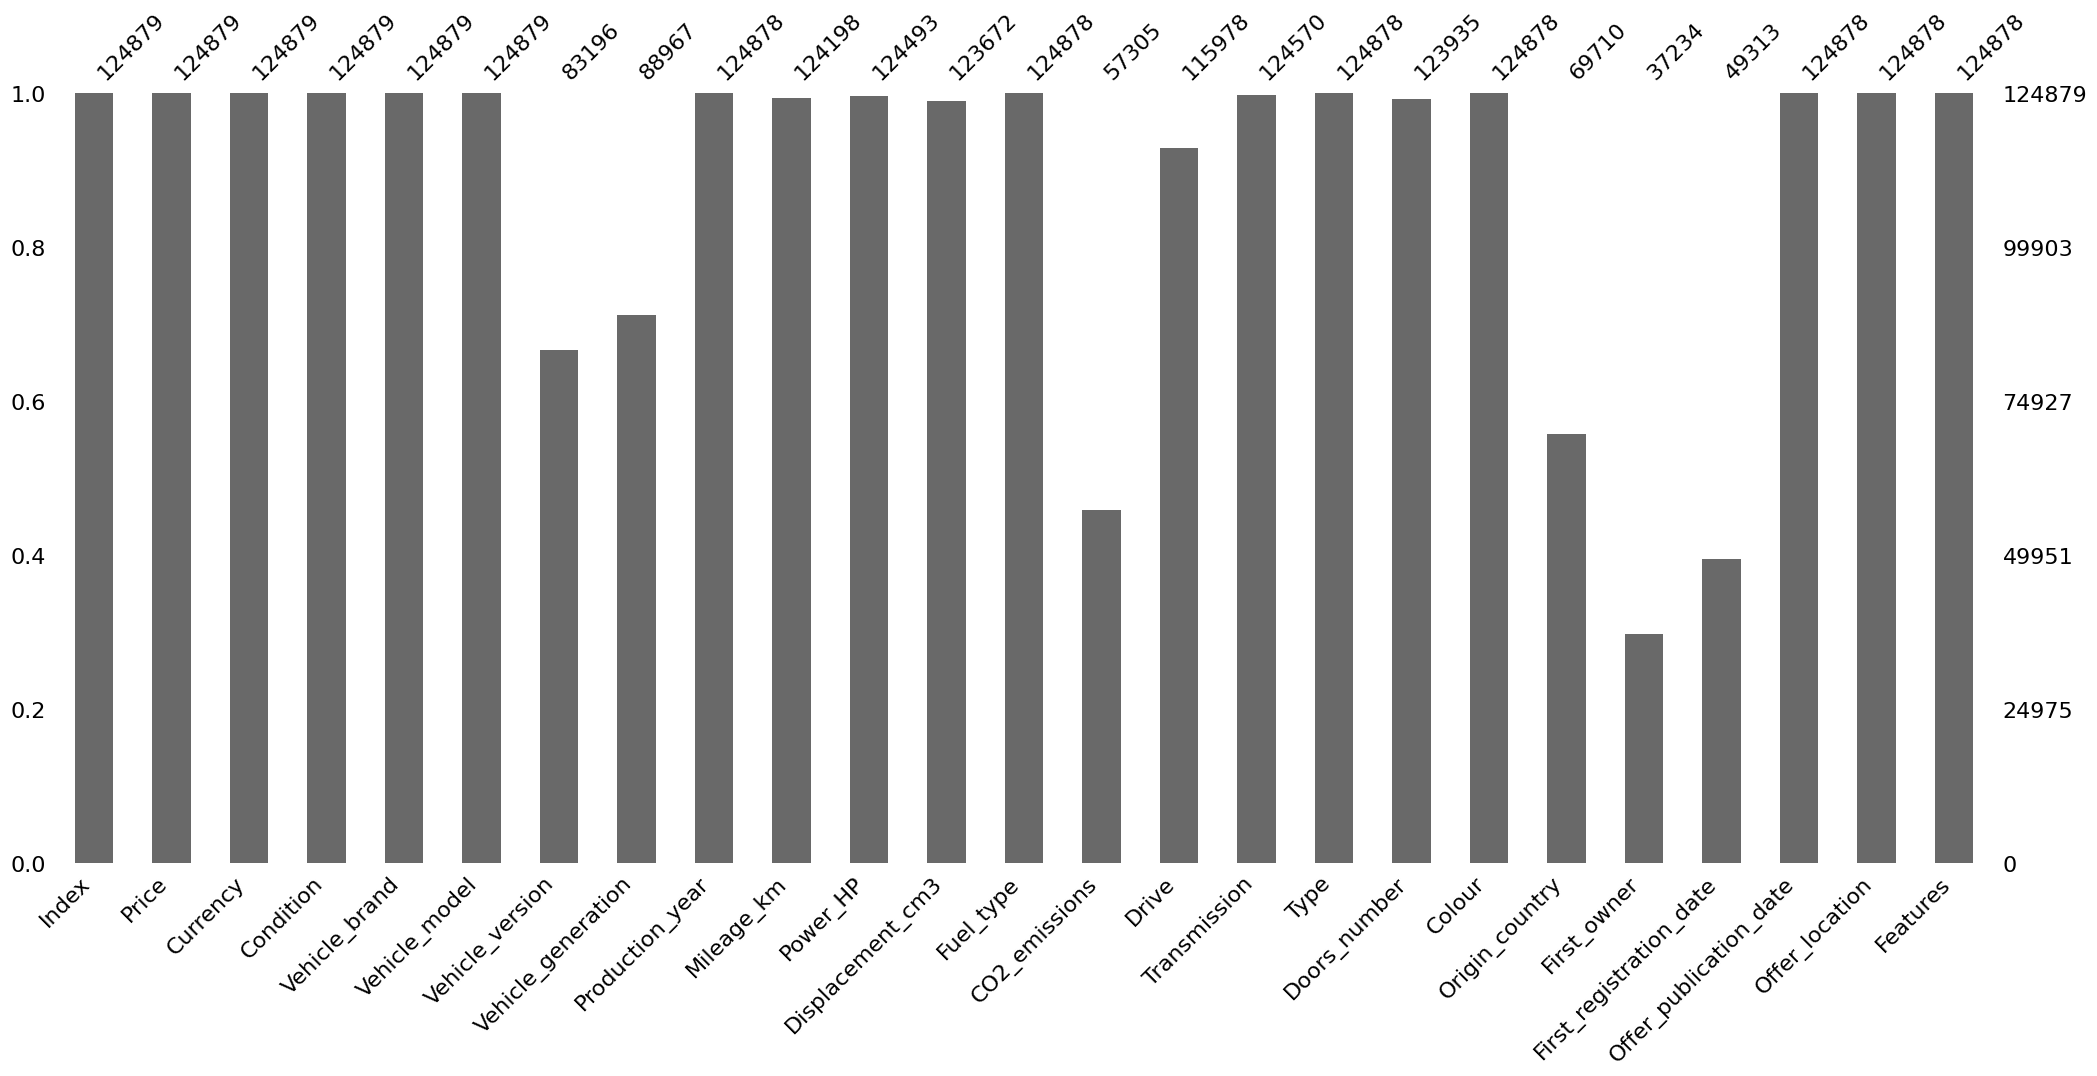

In [13]:
#Exploring the missing values
missingno.bar(df)
plt.show()

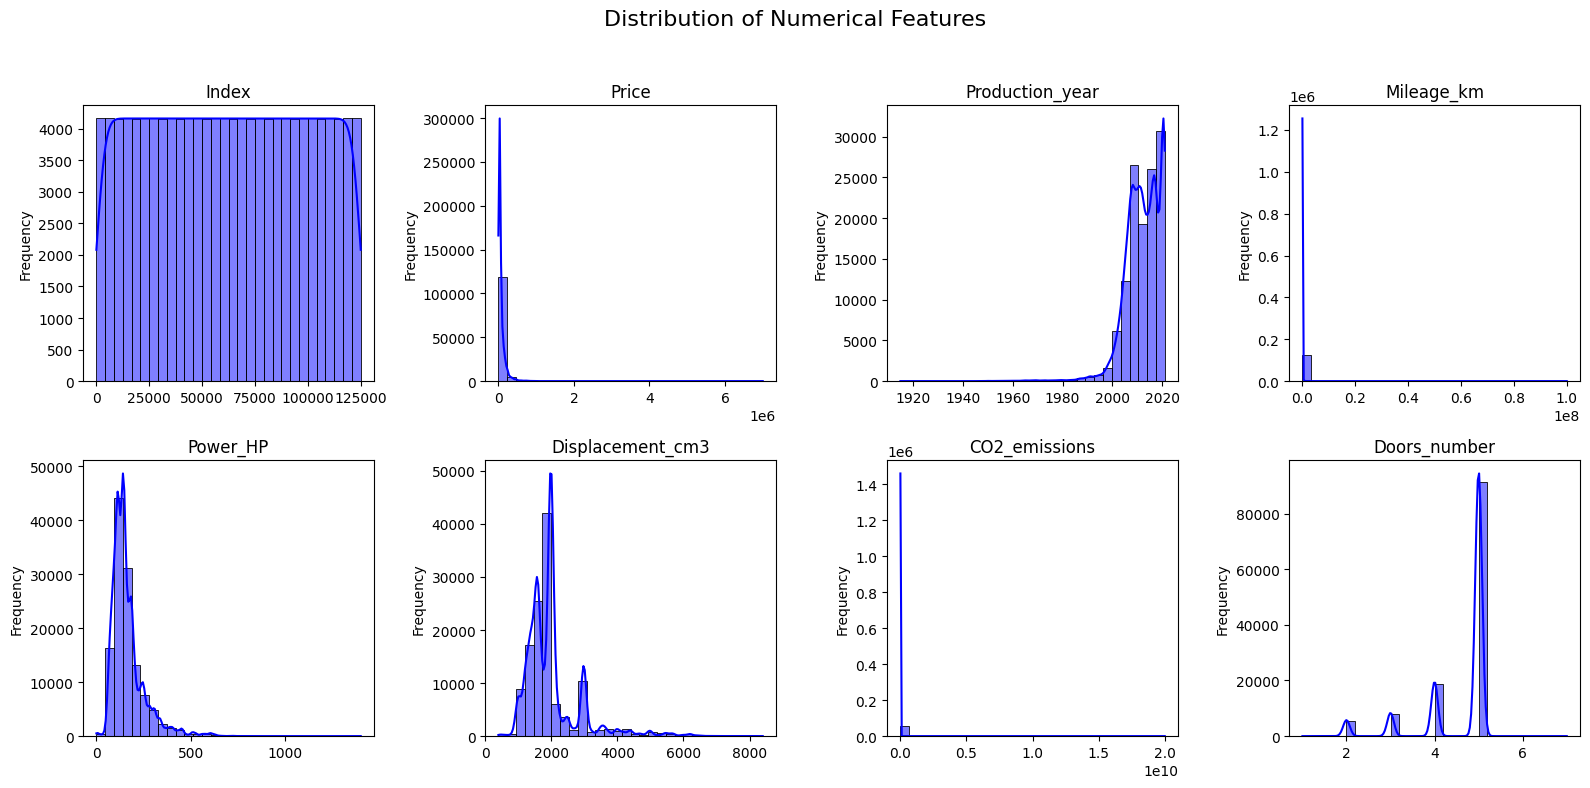

In [14]:
#Checking the distribution of numerical features

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

for i, col in enumerate(numerical_cols):
    row = i // 4
    col_idx = i % 4
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='blue', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"{col}")
    axes[row, col_idx].set_xlabel("")
    axes[row, col_idx].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

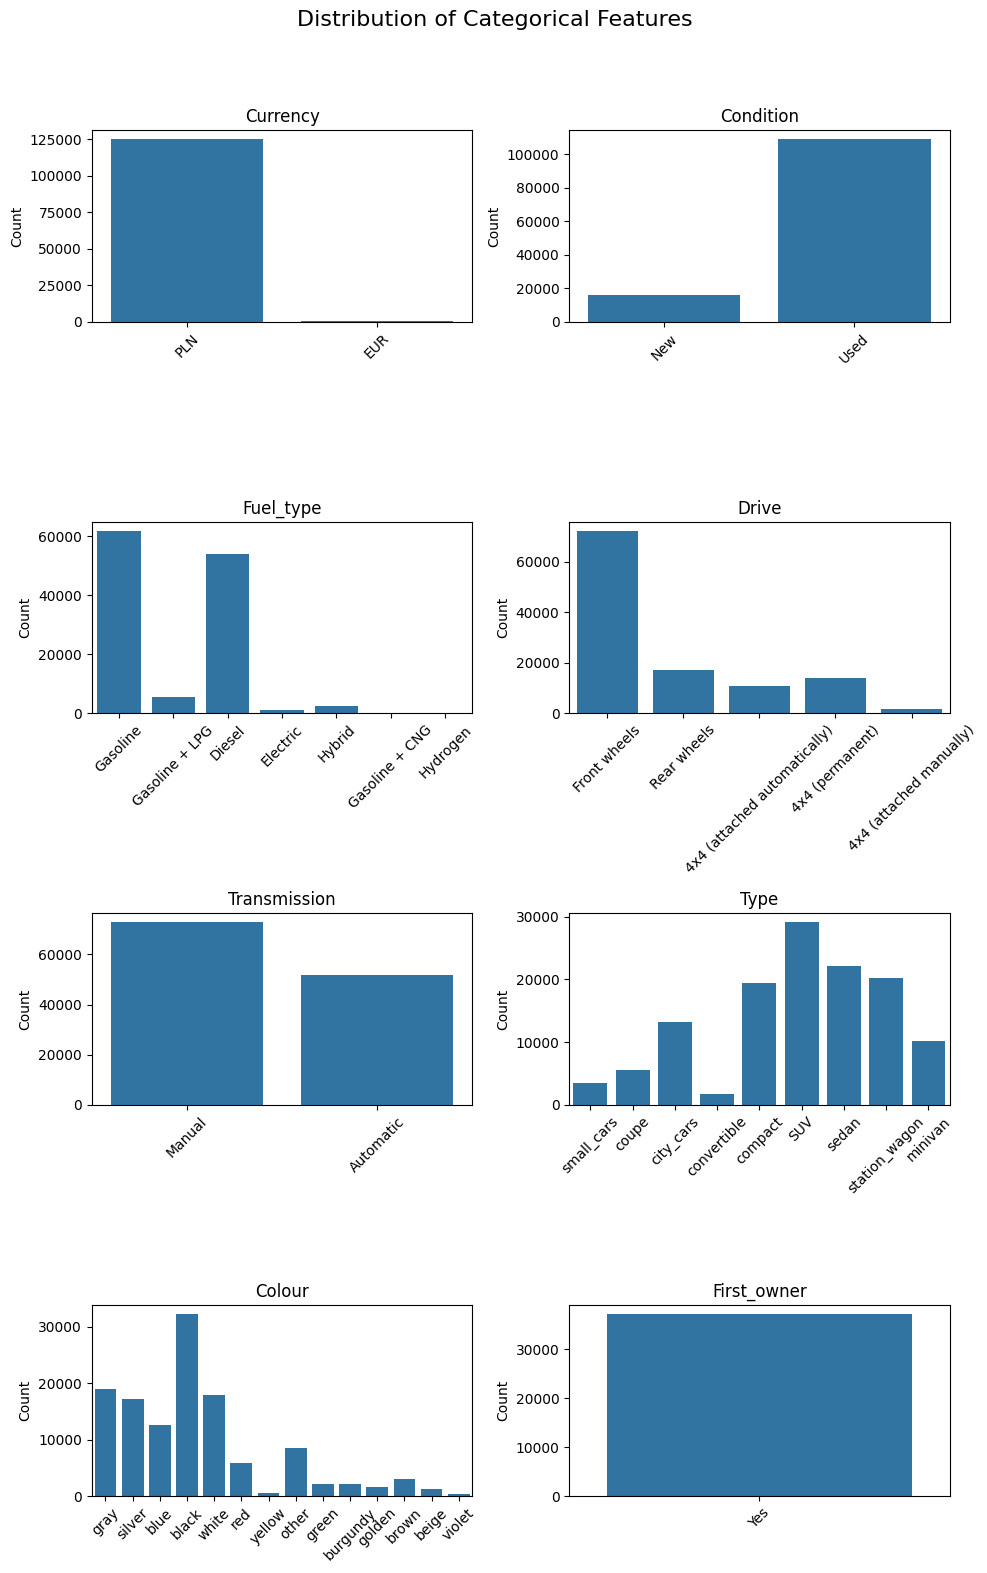

In [15]:
categorical_cols = ["Currency", "Condition", "Fuel_type", "Drive", "Transmission", "Type", "Colour", "First_owner"]

fig, axes = plt.subplots(4, 2, figsize=(10, 16))
fig.suptitle("Distribution of Categorical Features", fontsize=16)

for i, col in enumerate(categorical_cols):
    row = i // 2
    col_idx = i % 2
    sns.countplot(data=df, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"{col}")
    axes[row, col_idx].set_xlabel("")
    axes[row, col_idx].set_ylabel("Count")
    for label in axes[row, col_idx].get_xticklabels():
        label.set_rotation(45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [16]:
# Converting all prices to pln
exchange_rate = 4.2

df['Price_PLN'] = df['Price']
for index, row in df.iterrows():
    if row['Currency'] == 'EUR':
        df.at[index, 'Price_PLN'] = row['Price'] * exchange_rate

<ipython-input-16-5c746f185752>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '77481.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Price_PLN'] = row['Price'] * exchange_rate


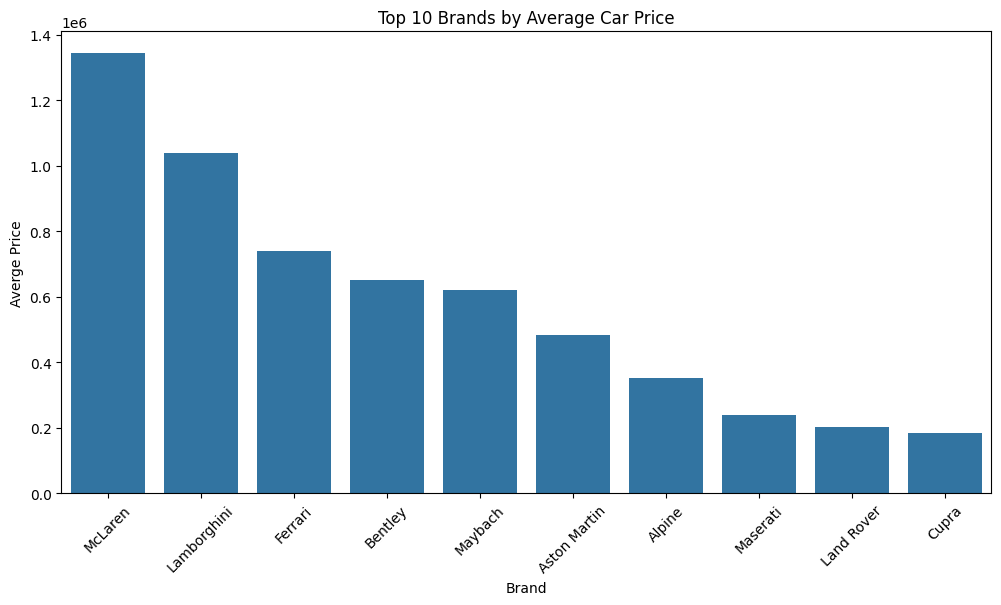

In [17]:
#Checking top 10 most expensive brands

top_brands = df.groupby("Vehicle_brand")["Price_PLN"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Averge Price")
plt.title("Top 10 Brands by Average Car Price")
plt.show()

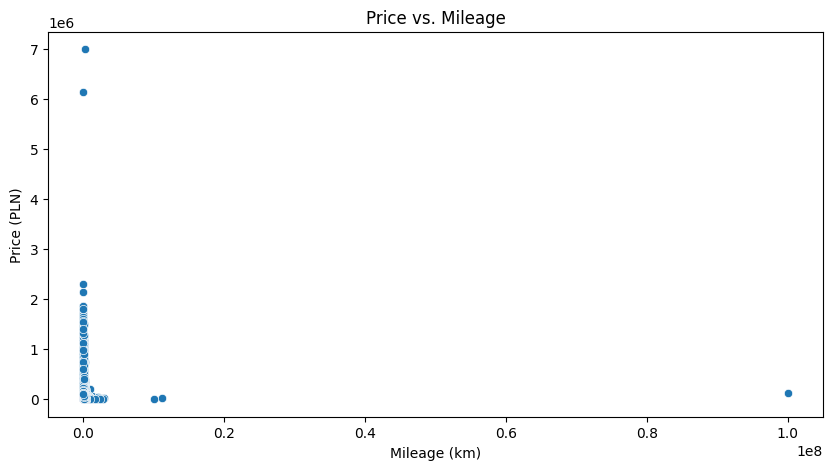

In [18]:
#Relationship between Price and mileage
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Mileage_km"], y=df["Price_PLN"])
plt.xlabel("Mileage (km)")
plt.ylabel("Price (PLN)")
plt.title("Price vs. Mileage")
plt.show()

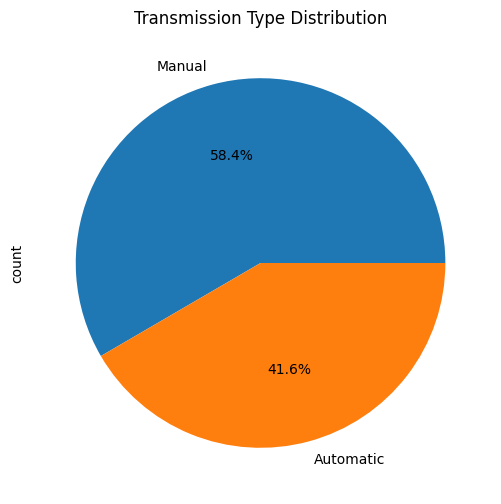

In [19]:
#Proportion of manual vs automatic transmission

df["Transmission"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))
plt.title("Transmission Type Distribution")
plt.show()

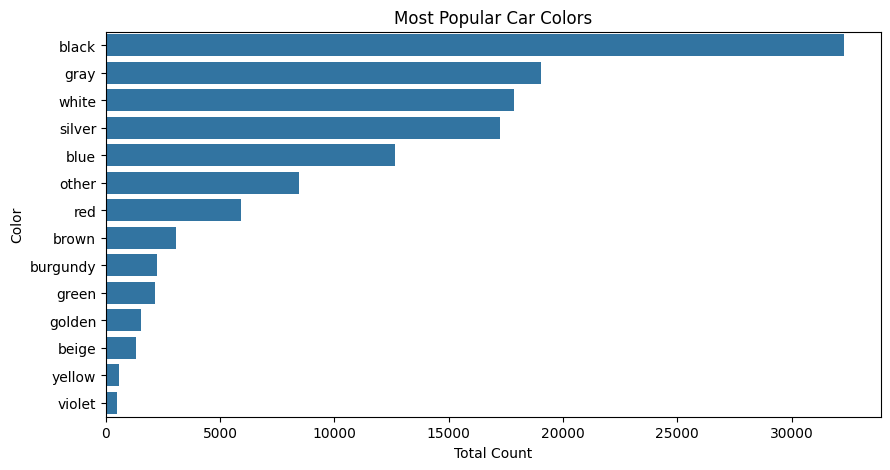

In [20]:
#Checking for which color of cars are the most common

plt.figure(figsize=(10, 5))
sns.countplot(y=df["Colour"], order=df["Colour"].value_counts().index)
plt.xlabel("Total Count")
plt.ylabel("Color")
plt.title("Most Popular Car Colors")
plt.show()

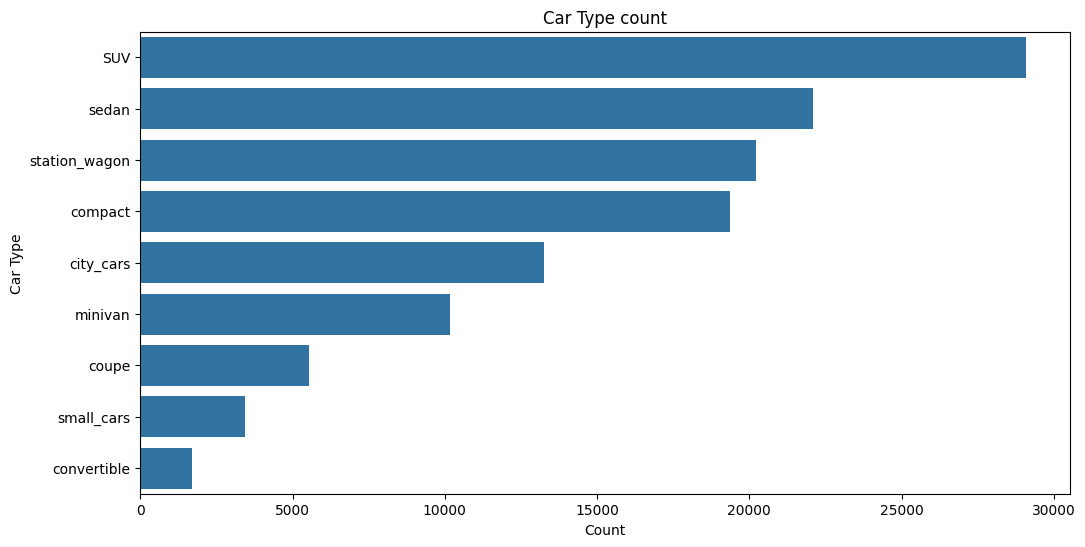

In [21]:
#Checking for which types of cars are the most common

plt.figure(figsize=(12, 6))
sns.countplot(y=df["Type"], order=df["Type"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Car Type")
plt.title("Car Type count")
plt.show()

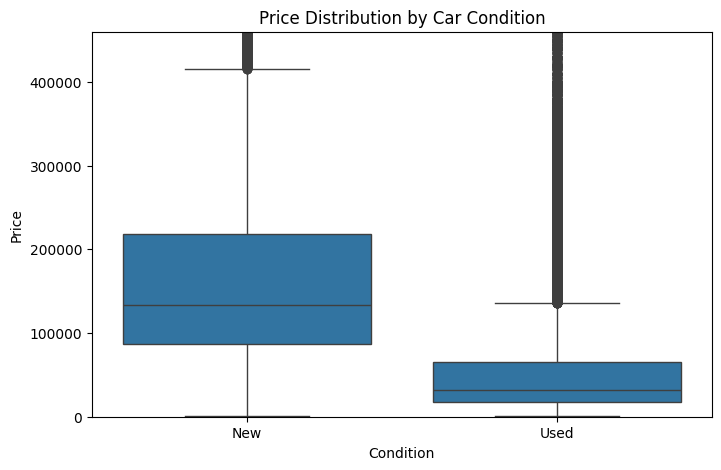

In [22]:
#Comparison of the distribution of prices between Used and New Cars
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Condition"], y=df["Price_PLN"])
plt.ylim(0, df["Price"].quantile(0.99))
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price Distribution by Car Condition")
plt.show()

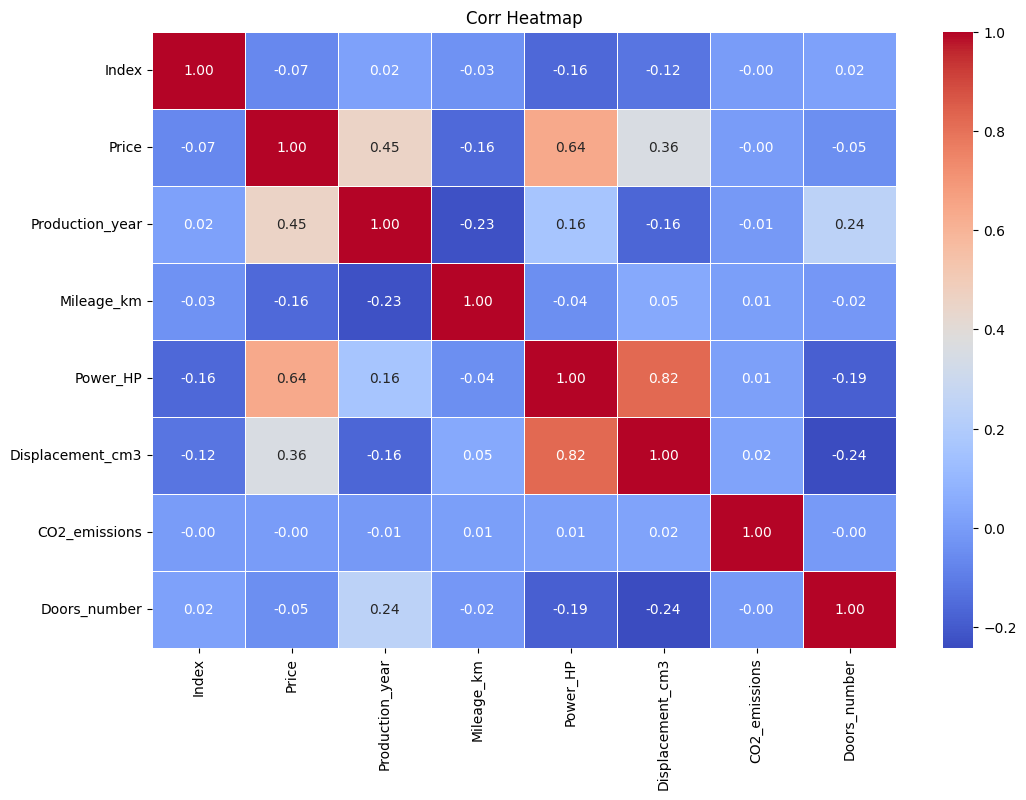

In [23]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corr Heatmap')
plt.show()

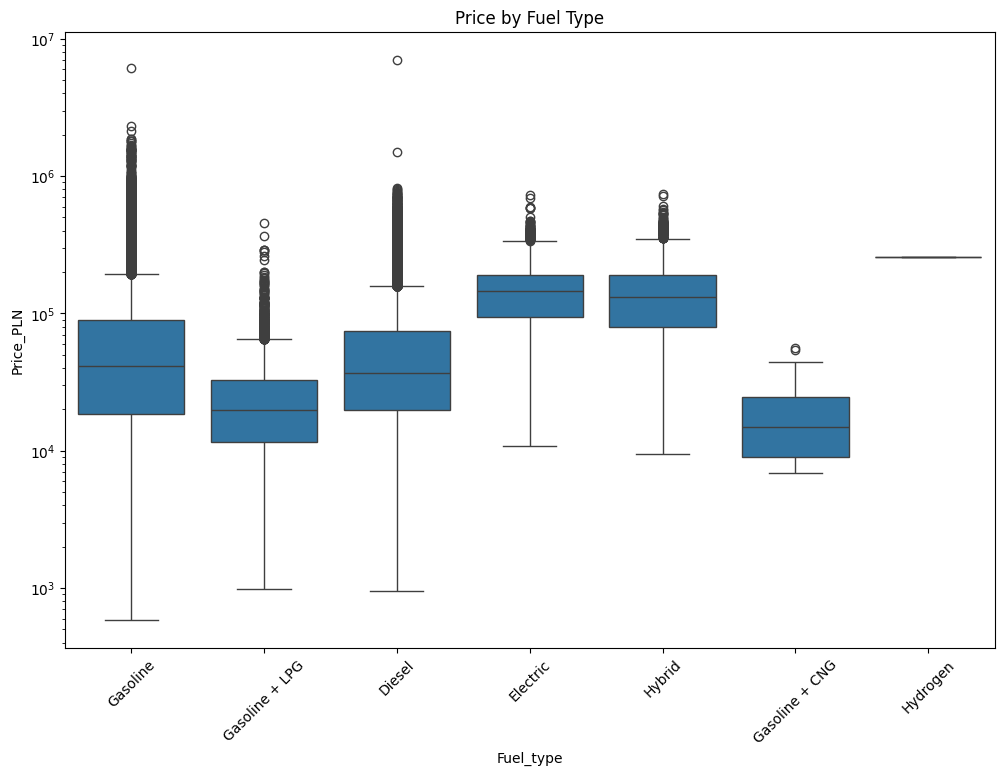

In [24]:
#comparison of price distribution for each fuel type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Fuel_type", y="Price_PLN")
plt.title("Price by Fuel Type")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

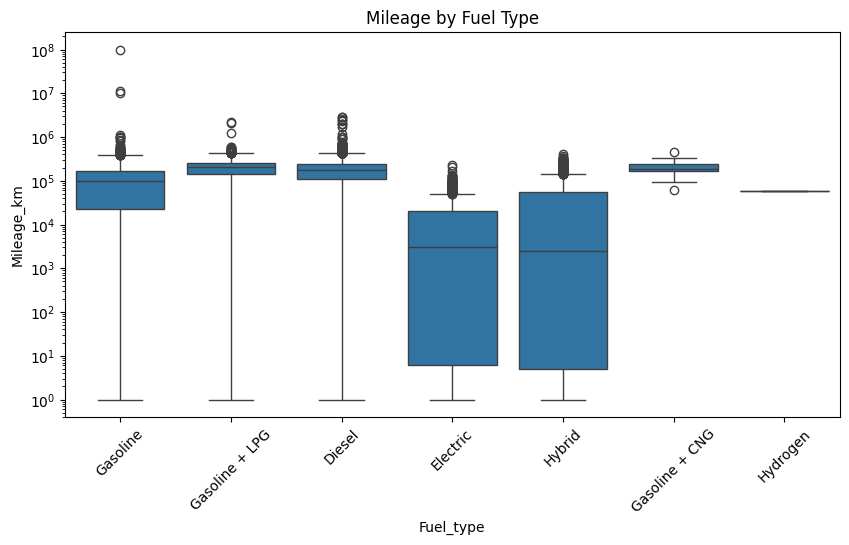

In [25]:
#Distribution of mileage based on each fuel type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Fuel_type", y="Mileage_km")
plt.yscale("log")
plt.title("Mileage by Fuel Type")
plt.xticks(rotation=45)
plt.show()

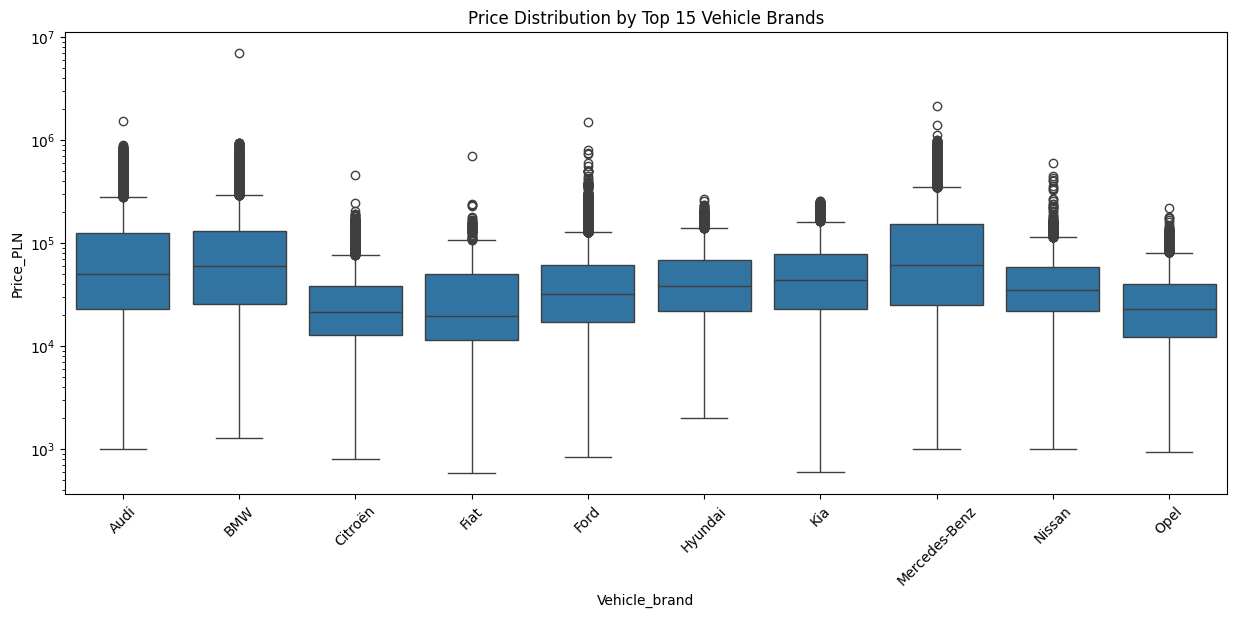

In [26]:
#Distribution of Prices of most common 10 brands
top_brands = df["Vehicle_brand"].value_counts().head(10).index
df_top_brands = df[df["Vehicle_brand"].isin(top_brands)]

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_top_brands, x="Vehicle_brand", y="Price_PLN")
plt.yscale("log")
plt.title("Price Distribution by Top 15 Vehicle Brands")
plt.xticks(rotation=45)
plt.show()

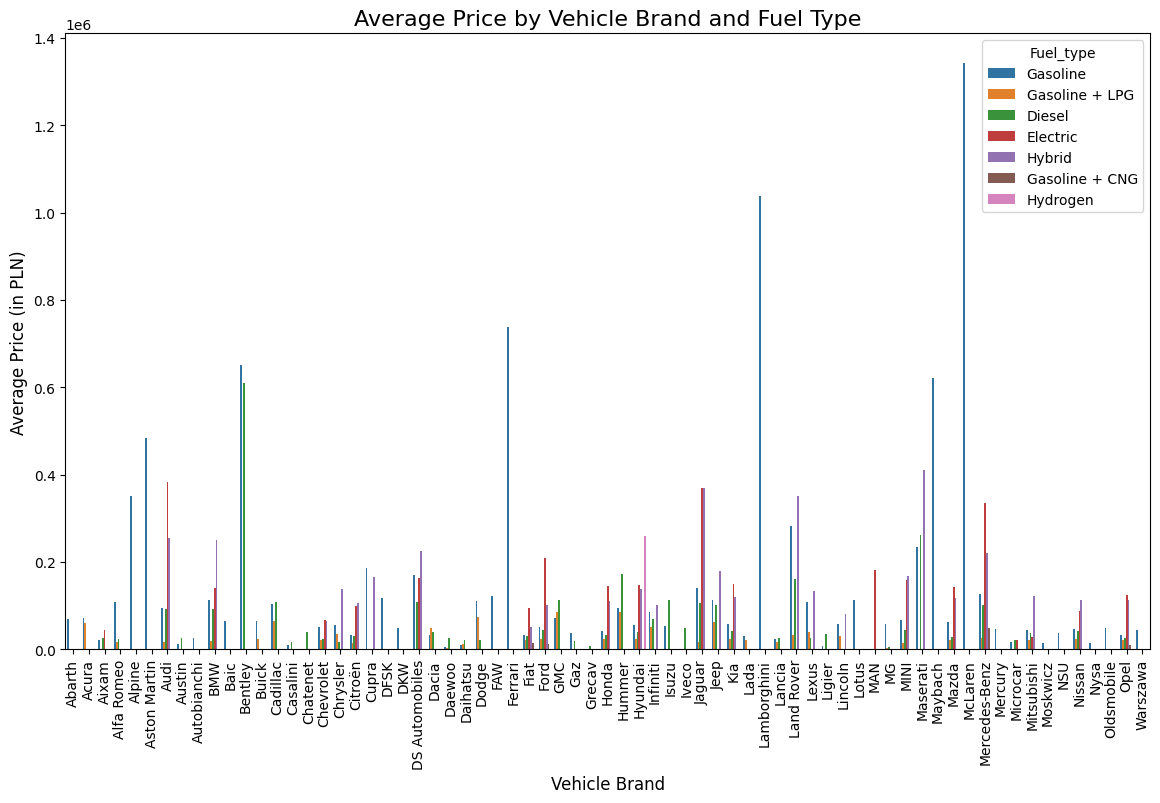

In [27]:
#Average price of each brand and fuel type
grouped_data = df.groupby(['Vehicle_brand', 'Fuel_type'])['Price_PLN'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='Vehicle_brand', y='Price_PLN', hue='Fuel_type')
plt.xticks(rotation=90)
plt.title('Average Price by Vehicle Brand and Fuel Type', fontsize=16)
plt.xlabel('Vehicle Brand', fontsize=12)
plt.ylabel('Average Price (in PLN)', fontsize=12)
plt.show()


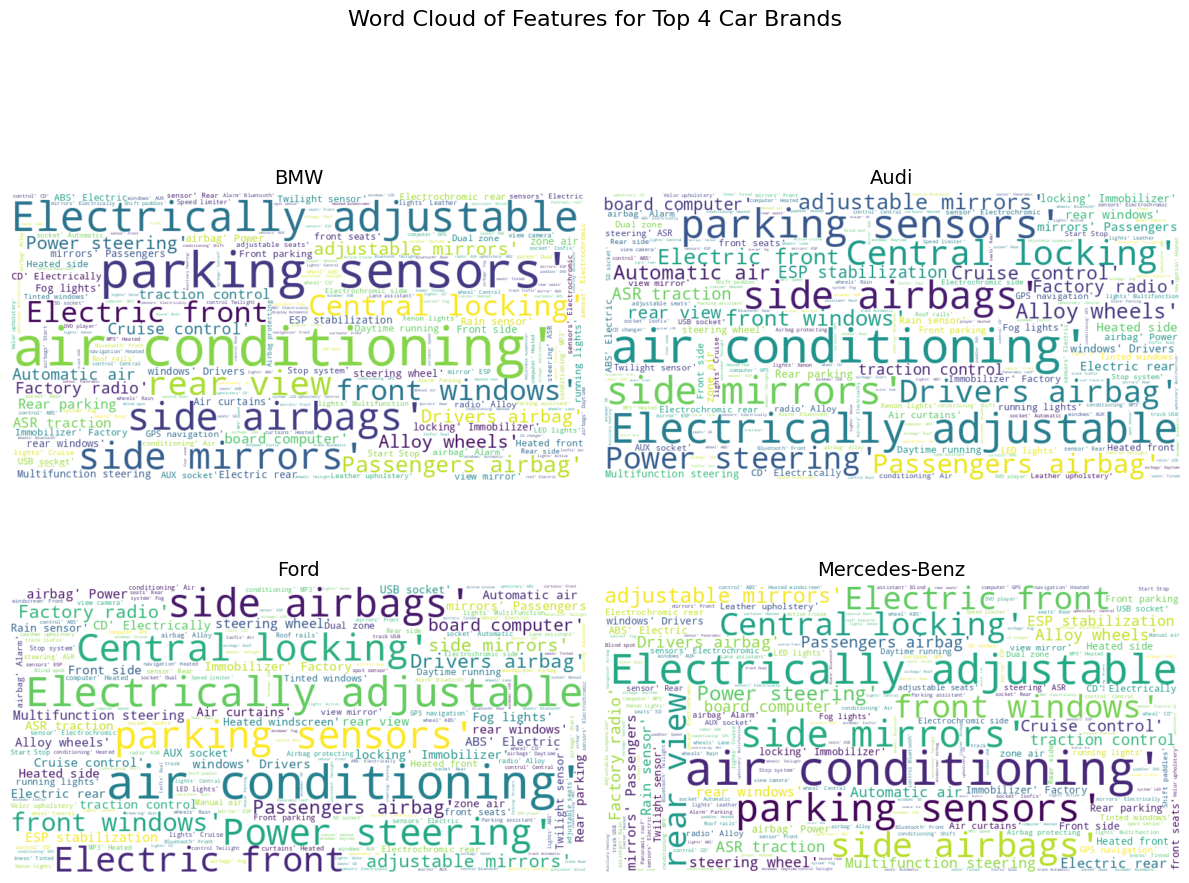

In [28]:
top_4_brands = df['Vehicle_brand'].value_counts().nlargest(4).index

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Word Cloud of Features for Top 4 Car Brands", fontsize=16)

for i, brand in enumerate(top_4_brands):
    ax = axes[i // 2, i % 2]
    combined_text = ' '.join(df[df['Vehicle_brand'] == brand]['Features'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(brand, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
